# EECS16A Discussion 3A

## Visualizing Matrices as Operations

This exercise is going to help you visualize matrices as operations. For example, when we multiply a vector by a rotation matrix, we will see it "rotate" in the true sense here. Similarly, when we multiply a matrix by a scalar matrix, we will see it "scale". The way we will see this is by applying the operation to all the vertices of a polygon and seeing how the polygon changes.
Let's first do the necessary imports and define some useful functions to do this.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""Function that takes the vertices of a polygon and applies a matrix "transformation" to each of them, effectively
"transforming" the polygon."""


def transform_the_polygon(polygon, T):
    transformed_polygon = []
    for point in polygon:
        transformed_point = np.dot(T, point)
        transformed_polygon.append(transformed_point)
    return transformed_polygon


"""Function that plots a polygon in the x-y plane, given its vertices as x-y coordinates. The plot is defined in terms
of line segments connecting all adjacent vertices of the polygon."""


def plot_the_polygon(polygon):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, xlim=[-4, 4], ylim=[-4, 4])
    for i in range(len(polygon) - 1):
        ax.plot(
            [polygon[i][0], polygon[i + 1][0]],
            [polygon[i][1], polygon[i + 1][1]],
            linewidth=4,
        )
    ax.plot(
        [polygon[i + 1][0], polygon[0][0]],
        [polygon[i + 1][1], polygon[0][1]],
        linewidth=4,
    )
    ax.grid(True)
    ax.axhline(y=0, color="k", linestyle="--", linewidth=2)
    ax.axvline(x=0, color="k", linestyle="--", linewidth=2)
    # plt.show()

Next, we define our starting polygon, a square whose side is of length 1. Let's see what the square looks like.

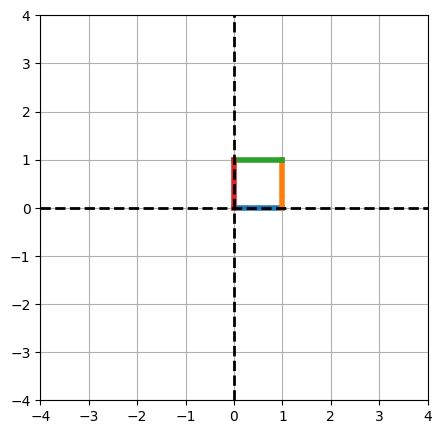

In [2]:
unit_square = [np.array([0, 0]), np.array([1, 0]), np.array([1, 1]), np.array([0, 1])]
plot_the_polygon(unit_square)
plt.show()

### Part 1: Rotation Matrices as Rotations

#### Code for the following sections:

(a) Given T1 (15 degree rotation) and T2 (30 degree rotation), describe how to rotate the unit square by 45 degrees.  How about 60 degrees?

(b) Try to rotate the unit squre by 60 degrees using only one matrix.

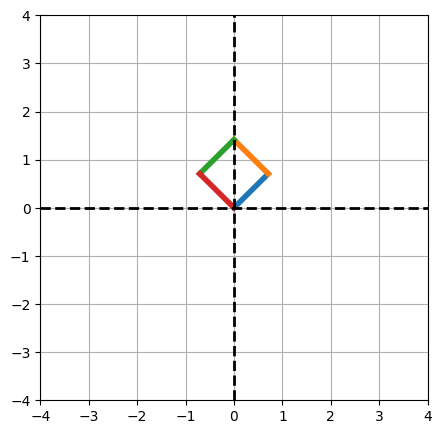

In [3]:
# R is a "rotation matrix."
# Example:
# angle = np.pi/2 # 90 degrees in radians
# R = np.array([[np.cos(angle), -np.sin(angle)],
#              [np.sin(angle), np.cos(angle)]])

angle1 = np.pi / 12  # 15 degrees in radians
T1 = np.array([[np.cos(angle1), -np.sin(angle1)], [np.sin(angle1), np.cos(angle1)]])

angle2 = np.pi / 6  # 30 degrees in radians
T2 = np.array([[np.cos(angle2), -np.sin(angle2)], [np.sin(angle2), np.cos(angle2)]])

T3 = np.dot(T1, T2)

rotated_square = transform_the_polygon(unit_square, T3)
plot_the_polygon(rotated_square)

And finally, we can "reflect" the square about the y-axis:

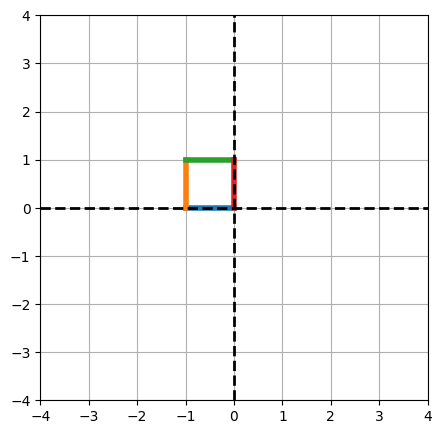

In [4]:
Re_y = np.array([[-1, 0], [0, 1]])
reflected_square = transform_the_polygon(unit_square, Re_y)
plot_the_polygon(reflected_square)

### Part 2: Commutativity of Operations

The next natural question to ask is the following: Does the *order* in which you apply these operations matter?

a) Let's see what happens to the unit square when we rotate the matrix by 60 degrees, and then reflect it along the y-axis.

In [5]:
# As the name indicates, R_60 rotates the matrix by 60 degrees.
rotation_angle = np.pi / 3  # 60 degrees in radians
R_60 = np.array(
    [
        [np.cos(rotation_angle), -np.sin(rotation_angle)],
        [np.sin(rotation_angle), np.cos(rotation_angle)],
    ]
)

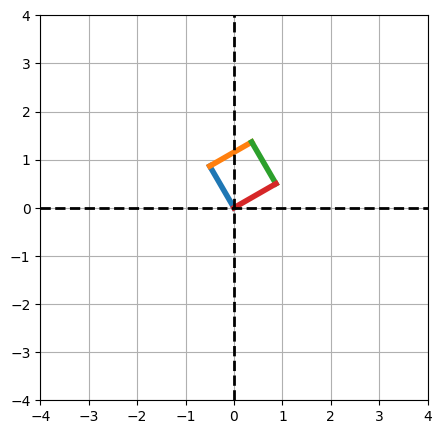

In [6]:
reflected_after_rotated_square = transform_the_polygon(unit_square, R_60)
reflected_after_rotated_square = transform_the_polygon(
    reflected_after_rotated_square, Re_y
)
plot_the_polygon(reflected_after_rotated_square)

b) Now, let's reflect *before* rotating.

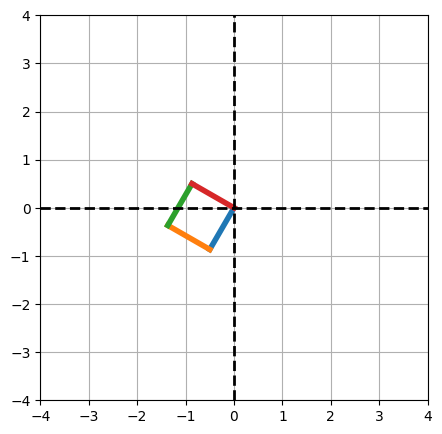

In [7]:
rotated_after_reflected_square = transform_the_polygon(unit_square, Re_y)
rotated_after_reflected_square = transform_the_polygon(
    rotated_after_reflected_square, R_60
)
plot_the_polygon(rotated_after_reflected_square)

We can also scale the square: 

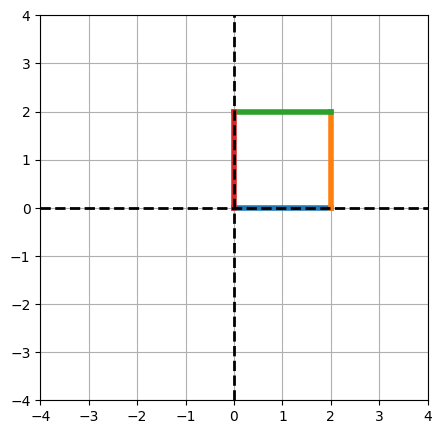

In [8]:
# S is a "scalar matrix."
S = np.array([[2, 0], [0, 2]])
scaled_square = transform_the_polygon(unit_square, S)
plot_the_polygon(scaled_square)